## Differential Equations

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode
import seaborn as sns
sns.set()

### 1. First Order Differential Equations:

 - Example 1: $\frac{dy}{dx} = \sin(x)$

In [27]:
def model(y, x):

    """
    The right-hand side of the  ODE
    """
    dydx = math.sin(x)
    return dydx

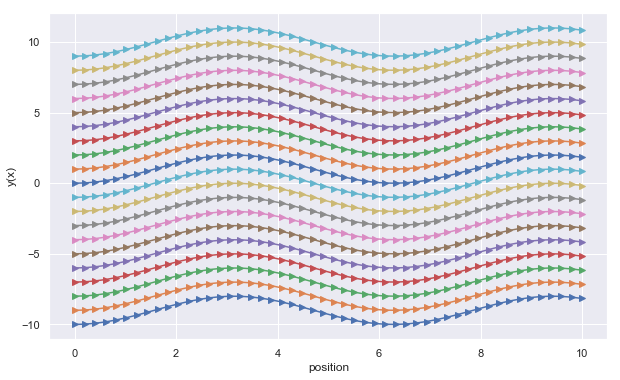

In [29]:
# initial condition
y0 = 0

# time points
x = np.linspace(0,10)

# solve ODE
y = odeint(model,y0,x)

# plot results
plt.figure(figsize =[10,6])
for c in range(-10,10):
    plt.plot(x,y+c,'->')

plt.xlabel('position')
plt.ylabel('y(x)')
plt.axis()
plt.show()


- Example 2: $\frac{dy}{dx} = y$

In [30]:
def model(y, x):

    """
    The right-hand side of the  ODE
    """
    dydx = y
    return dydx

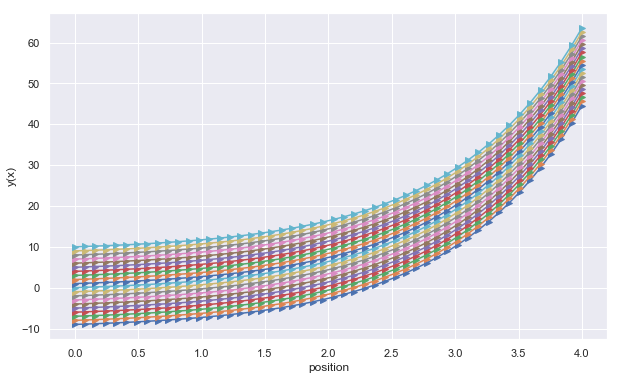

In [32]:
# initial condition
y0 = 1

# time points
x = np.linspace(0,4)

# solve ODE
y = odeint(model,y0,x)

# plot results
plt.figure(figsize =[10,6])
for c in range(-10,10):
    plt.plot(x,y+c,'->')

plt.xlabel('position')
plt.ylabel('y(x)')
plt.show()


### 2. Second Order Differential Equations

- Example 1: Damped Harmonic Oscillator

The equation of motion for the damped oscillator is:

$\frac{d^{2}x}{dt^{2}} + 2 \zeta \omega_{0}\frac{dx}{dt} + \omega_{0}^{2}x = 0$

Where $x$ is the position of the oscillator, $\omega_{0}$ is the frequency, the $\zeta$ is the damping ratio. To write second order  ODE on standard form we introduce $p = \frac{dp}{dt}$:

$\frac{dp}{dt} = -2\zeta \omega_{0}p -\omega_{0}^{2}x$

$\frac{dx}{dt} = p$

In [34]:
def dy(y, t, zeta, w0):

    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x
    return [dx, dp]

In [35]:
# initial state:
y0 = [1.0, 0.0]

In [39]:
# time coodinate to solve the ODE for
t = np.linspace(0, 5, 1000)
w0 = 2*np.pi*1.0

In [40]:
# solve the ODE problem for three different values of the damping ratio
y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

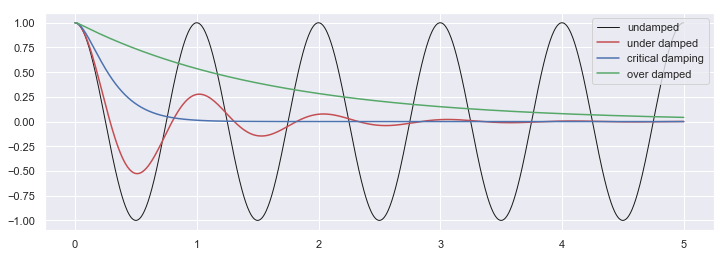

In [42]:
plt.figure(figsize = [12,4])
plt.plot(t, y1[:,0], 'k', label="undamped", linewidth=1.0)
plt.plot(t, y2[:,0], 'r', label="under damped")
plt.plot(t, y3[:,0], 'b', label=r"critical damping")
plt.plot(t, y4[:,0], 'g', label="over damped")
plt.legend();

### References:
1. http://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html
2. http://folk.ntnu.no/leifh/teaching/tkt4140/._main055.html
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
4. https://gribblelab.org/compneuro2012/2_Modelling_Dynamical_Systems.html
5. https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html
6. https://en.wikibooks.org/wiki/Ordinary_Differential_Equations/Graphing_1
7. https://galileo-unbound.blog/tag/python-code/
8. https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/